In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [2]:
img_path = '../img/{}.png'

# Linear Systems: Exercises

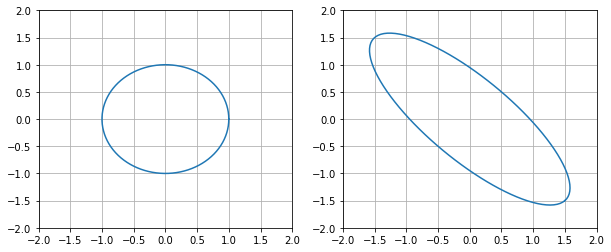

In [3]:
theta = -np.pi/4
d1 = 1.5*np.sqrt(2)
d2 = 0.5*np.sqrt(2)
A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]) @ np.diag([d1,d2])
T = np.linspace(0,2*np.pi,100)
S = np.vstack([np.cos(T),np.sin(T)])
AS = A@S
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.plot(S[0,:],S[1,:])
ax1.grid(True); ax1.axis([-2,2,-2,2])
ax2.plot(AS[0,:],AS[1,:])
ax2.grid(True); ax2.axis([-2,2,-2,2])
plt.savefig(img_path.format('img01'),dpi=300)
plt.show()

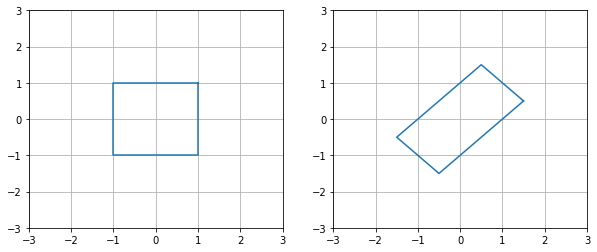

In [4]:
theta = -np.pi/4
d1 = np.sqrt(2)/2
d2 = np.sqrt(2)
A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]) @ np.diag([d1,d2])
S = np.array([[1,-1,-1,1,1],[1,1,-1,-1,1]])
AS = A@S
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.plot(S[0,:],S[1,:])
ax1.grid(True); ax1.axis([-3,3,-3,3])
ax2.plot(AS[0,:],AS[1,:])
ax2.grid(True); ax2.axis([-3,3,-3,3])
plt.savefig(img_path.format('img02'),dpi=300)
plt.show()

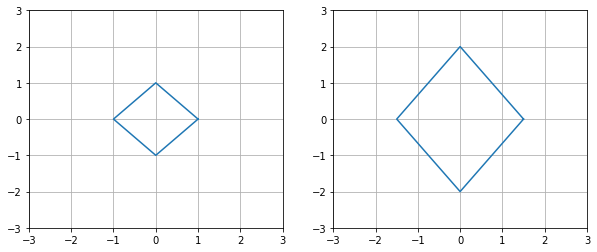

In [5]:
theta = 0
d1 = 1.5
d2 = 2
A = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]) @ np.diag([d1,d2])
S = np.array([[1,0,-1,0,1],[0,1,0,-1,0]])
AS = A@S
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.plot(S[0,:],S[1,:])
ax1.grid(True); ax1.axis([-3,3,-3,3])
ax2.plot(AS[0,:],AS[1,:])
ax2.grid(True); ax2.axis([-3,3,-3,3])
plt.savefig(img_path.format('img03'),dpi=300)
plt.show()

# Interpolation

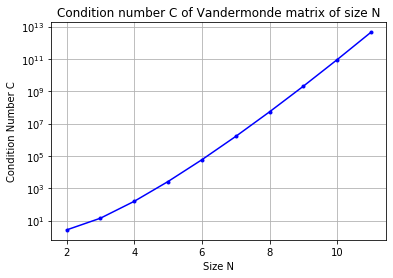

In [44]:
N = 11
Ns = np.arange(2,N+1)
Cs = []
for n in Ns:
    t = np.arange(0,n)
    A = np.vander(t)
    C = np.linalg.cond(A)
    Cs.append(C)
plt.semilogy(Ns,Cs,'b.-')
plt.grid(True), plt.title('Condition number C of Vandermonde matrix of size N')
plt.xlabel('Size N'), plt.ylabel('Condition Number C')
plt.savefig(img_path.format('01_05_img01'),dpi=300)
plt.show()

# Cubic Spline

In [46]:
from scipy.interpolate import CubicSpline as CS

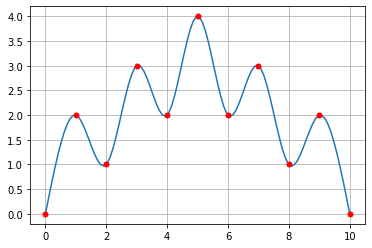

In [47]:
t = [0,1,2,3,4,5,6,7,8,9,10]
y = [0,2,1,3,2,4,2,3,1,2,0]
p = CS(t,y,bc_type="natural")
ts = np.linspace(0,10,100)
ys = p(ts)
plt.plot(ts,ys,t,y,'r.',ms=10)
plt.grid(True)
plt.savefig(img_path.format('01_06_img01'),dpi=300)
plt.show()

In [48]:
def cubicM(N):
    L = 1
    A = np.array([[L**3,L**2,L],[3*L**2,2*L,1],[6*L,2,0]])
    B = np.array([[0,0,0],[0,0,-1],[0,-2,0]])
    T = np.array([[0,0,0],[0,2,0],[0,0,0]])
    V = np.array([[L**3,L**2,L],[0,2,0],[6*L,2,0]])

    M1 = la.block_diag(*[A for _ in range(1,N)])
    M1 = np.hstack((M1,np.zeros((3*(N - 1),3))))
    M2 = la.block_diag(*[B for _ in range(1,N)])
    M2 = np.hstack((np.zeros((3*(N - 1),3)),M2))
    M = M1 + M2
    C = np.hstack((T,np.zeros((3,3*(N - 2))),V))
    M = np.vstack((M,C))
    return M

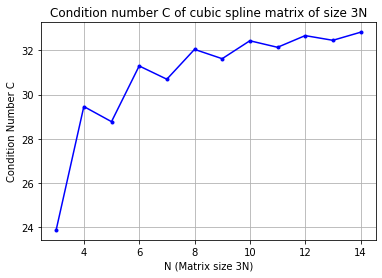

In [49]:
Ns = np.arange(3,15)
Cs = []
for N in Ns:
    M = cubicM(N)
    CN = np.linalg.cond(M)
    Cs.append(CN)
plt.plot(Ns,Cs,'b.-')
plt.grid(True), plt.title('Condition number C of cubic spline matrix of size 3N')
plt.xlabel('N (Matrix size 3N)'), plt.ylabel('Condition Number C')
plt.savefig(img_path.format('01_06_img02'),dpi=300)
plt.show()

# Finite Differences

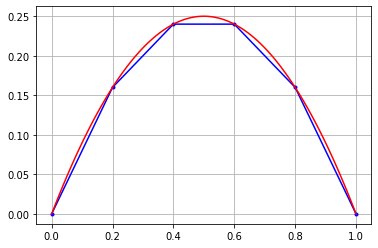

In [10]:
alpha = 0; beta = 0; N = 4;
t0 = 0; tf = 1; h = (tf - t0)/(N + 1);
t = np.linspace(t0,tf,N+2)
r = -2*np.ones(t.size)
A = np.diag(np.repeat(-2,N)) + np.diag(np.repeat(1,N-1),1) + np.diag(np.repeat(1,N-1),-1)
b = h**2*r[1:N+1] - np.concatenate([alpha,np.zeros(N-2),beta],axis=None)
y = la.solve(A,b)
solution = np.concatenate([alpha,y,beta],axis=None)
plt.plot(t,solution,'b.-')
T = np.linspace(t0,tf,100)
Y = T*(1 - T)
plt.plot(T,Y,'r')
plt.grid(True)
plt.savefig(img_path.format('01_08_img01'),dpi=300)
plt.show()

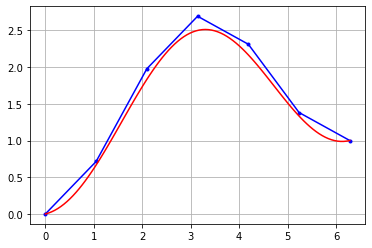

In [11]:
alpha = 0; beta = 1; N = 5;
t0 = 0; tf = 2*np.pi; h = (tf - t0)/(N + 1);
t = np.linspace(t0,tf,N+2)
r = np.cos(t)
A = np.diag(np.repeat(-2,N)) + np.diag(np.repeat(1,N-1),1) + np.diag(np.repeat(1,N-1),-1)
b = h**2*r[1:N+1] - np.concatenate([alpha,np.zeros(N-2),beta],axis=None)
y = la.solve(A,b)
solution = np.concatenate([alpha,y,beta],axis=None)
plt.plot(t,solution,'b.-')
T = np.linspace(t0,tf,100)
Y = 1 - np.cos(T) + T/2/np.pi
plt.plot(T,Y,'r')
plt.grid(True)
plt.savefig(img_path.format('01_08_img02'),dpi=300)
plt.show()

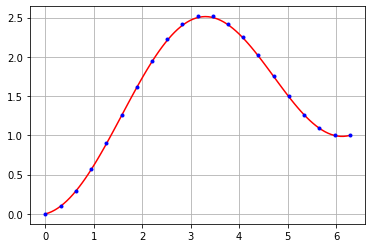

In [12]:
alpha = 0; beta = 1; N = 19;
t0 = 0; tf = 2*np.pi; h = (tf - t0)/(N + 1);
t = np.linspace(t0,tf,N+2)
r = np.cos(t)
A = np.diag(np.repeat(-2,N)) + np.diag(np.repeat(1,N-1),1) + np.diag(np.repeat(1,N-1),-1)
b = h**2*r[1:N+1] - np.concatenate([alpha,np.zeros(N-2),beta],axis=None)
y = la.solve(A,b)
solution = np.concatenate([alpha,y,beta],axis=None)
T = np.linspace(t0,tf,100)
Y = 1 - np.cos(T) + T/2/np.pi
plt.plot(T,Y,'r')
plt.plot(t,solution,'b.')
plt.grid(True)
plt.savefig(img_path.format('01_08_img03'),dpi=300)
plt.show()

$$
y'' + p(t)y' + q(t)y = r(t)
$$

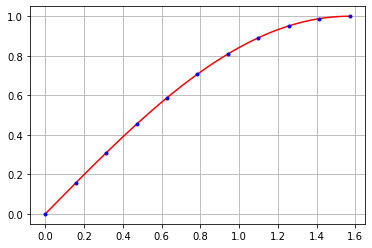

In [13]:
alpha = 0; beta = 1; N = 9;
t0 = 0; tf = np.pi/2; h = (tf - t0)/(N + 1);
t = np.linspace(t0,tf,N+2)

p = np.zeros(t.size)
q = np.ones(t.size)
r = np.zeros(t.size)

a = 1 - h*p/2
b = h**2*q - 2
c = 1 + h*p/2
A = np.diag(b[1:N+1]) + np.diag(c[1:N],1) + np.diag(a[2:N+1],-1)

b = h**2*r[1:N+1] - np.concatenate([a[1]*alpha,np.zeros(N-2),c[N]*beta],axis=None)
y = la.solve(A,b)

solution = np.concatenate([alpha,y,beta],axis=None)
T = np.linspace(t0,tf,100)
Y = np.sin(T)
plt.plot(T,Y,'r')
plt.plot(t,solution,'b.')
plt.grid(True)
plt.show()

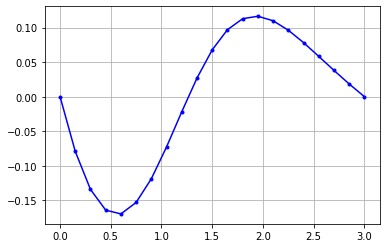

In [14]:
alpha = 0; beta = 0; N = 19;
t0 = 0; tf = 3; h = (tf - t0)/(N + 1);
ts = np.linspace(t0,tf,N+2)

p = lambda t: t**2
ps = p(ts)
q = lambda t: np.ones(t.size)
qs = q(ts)
r = lambda t: np.cos(t)
rs = r(ts)

a = 1 - h*ps/2
b = h**2*qs - 2
c = 1 + h*ps/2
A = np.diag(b[1:N+1]) + np.diag(c[1:N],1) + np.diag(a[2:N+1],-1)

b = h**2*rs[1:N+1] - np.concatenate([a[1]*alpha,np.zeros(N-2),c[N]*beta],axis=None)
y = la.solve(A,b)

solution = np.concatenate([alpha,y,beta],axis=None)
plt.plot(ts,solution,'b.-')
plt.grid(True)
plt.savefig(img_path.format('01_08_img04'),dpi=300)
plt.show()

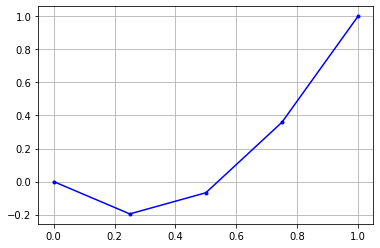

In [15]:
alpha = 0; beta = 1; N = 3;
t0 = 0; tf = 1; h = (tf - t0)/(N + 1);
ts = np.linspace(t0,tf,N+2)

p = lambda t: np.zeros(t.size)
ps = p(ts)
q = lambda t: np.ones(t.size)
qs = q(ts)
r = lambda t: 5/(1 + t**4)
rs = r(ts)

a = 1 - h*ps/2
b = h**2*qs - 2
c = 1 + h*ps/2
A = np.diag(b[1:N+1]) + np.diag(c[1:N],1) + np.diag(a[2:N+1],-1)

b = h**2*rs[1:N+1] - np.concatenate([a[1]*alpha,np.zeros(N-2),c[N]*beta],axis=None)
y = la.solve(A,b)

solution = np.concatenate([alpha,y,beta],axis=None)
plt.plot(ts,solution,'b.-')
plt.grid(True)
plt.show()